# E-COMMERCE SALES PROJECT:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
customers = pd.read_csv('/content/drive/MyDrive/DATA/customers - customers.csv')
order_items = pd.read_csv('/content/drive/MyDrive/DATA/order_items - order_items.csv')
orders = pd.read_csv('/content/drive/MyDrive/DATA/orders - orders.csv')
payments = pd.read_csv('/content/drive/MyDrive/DATA/payments - payments.csv')
products = pd.read_csv('/content/drive/MyDrive/DATA/products - products.csv')
sellers = pd.read_csv('/content/drive/MyDrive/DATA/sellers - sellers.csv')
geolocation = pd.read_csv('/content/drive/MyDrive/DATA/geolocation.csv')

In [ ]:
products

,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,Furniture Decoration,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,Construction Tools Illumination,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed table bath,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,computer accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


#**A. BASIC PROBLEMS:**

1. List all unique cities where customers are located.

In [ ]:
unique_cities=customers['customer_city'].unique()
pd.DataFrame(unique_cities)

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


2. Count the number of orders placed in 2017.

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders_2017 = orders[orders['order_purchase_timestamp'].dt.year == 2017]

orders_2017_count = orders_2017.shape[0]
print("orders_2017:",orders_2017_count)

orders_2017: 45101


3. Find the total sales per category

In [ ]:

merged_data = pd.merge(order_items, products[['product_id', 'product category']], on='product_id', how='inner')

merged_data = pd.merge(merged_data, payments[['order_id', 'payment_value']], on='order_id', how='inner')

total_sales_per_category = merged_data.groupby('product category')['payment_value'].sum().reset_index()

total_sales_per_category = total_sales_per_category.sort_values(by='payment_value', ascending=False)

pd.DataFrame(total_sales_per_category)

,product category,payment_value
49,bed table bath,1712553.67
30,HEALTH BEAUTY,1657373.12
53,computer accessories,1585330.45
24,Furniture Decoration,1430176.39
45,Watches present,1429216.68
...,...,...
41,PC Gamer,2174.43
32,House Comfort 2,1710.54
50,cds music dvds,1199.43
18,Fashion Children's Clothing,785.67


4. Calculate the percentage of orders that were paid
in installments.

In [ ]:
installments_percentage = payments[payments['payment_installments'] > 1].shape[0] / payments.shape[0] * 100
print(f'{installments_percentage=}')

installments_percentage=49.41763086460158


5.Count the number of customers from each state.

In [ ]:
customers_per_state = customers.groupby('customer_state')['customer_id'].count()
pd.DataFrame(customers_per_state)

,customer_id
customer_state,
AC,81
AL,413
AM,148
AP,68
BA,3380
CE,1336
DF,2140
ES,2033
GO,2020


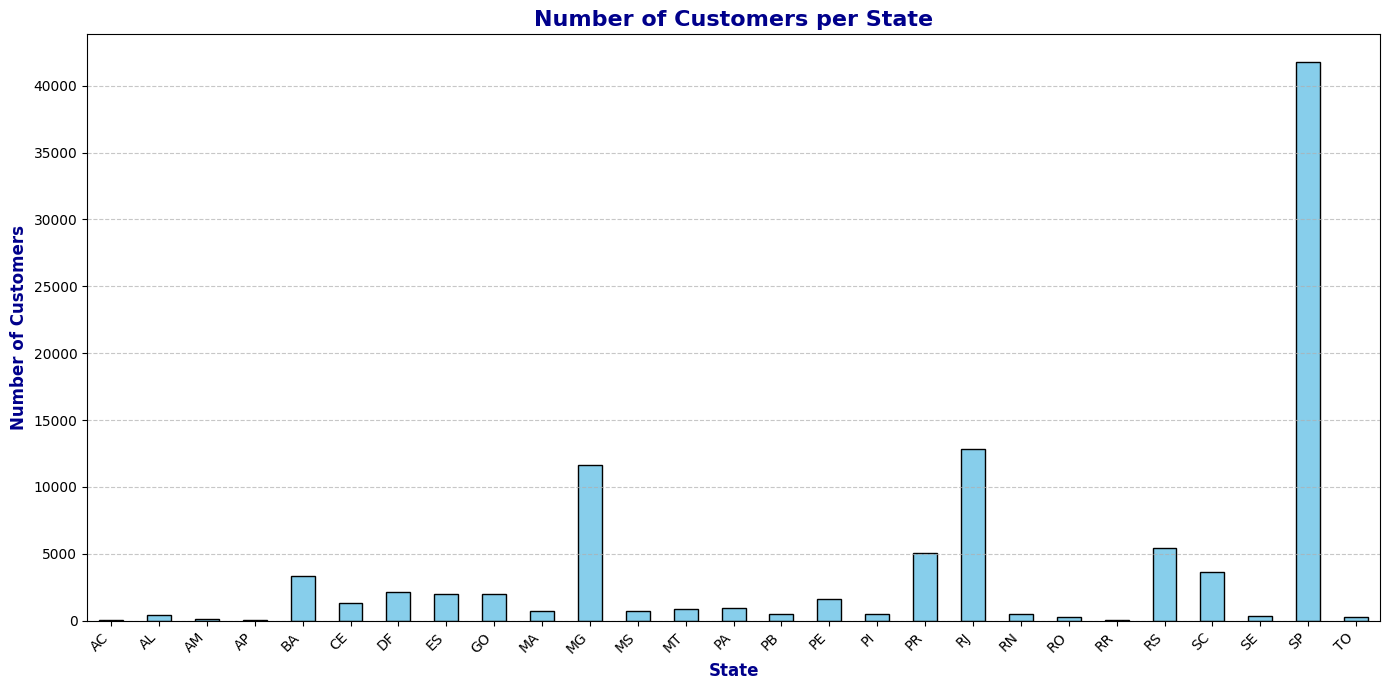

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
customers_per_state.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Number of Customers per State', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('State', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Number of Customers', fontsize=12, fontweight='bold', color='darkblue')

plt.xticks(rotation=45, ha='right', fontsize=10, color='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


# **B.INTERMEDIATE QUESTIONS :**

1.Calculate the number of orders per month in 2018.

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

orders_2018 = orders[orders['order_purchase_timestamp'].dt.year == 2018]

orders_per_month_2018_df = (
    orders_2018['order_purchase_timestamp']
    .dt.to_period('M')
    .value_counts()
    .sort_index()
    .rename_axis('Month')
    .reset_index(name='Order Count')
)

orders_per_month_2018_df['Month'] = pd.to_datetime(orders_per_month_2018_df['Month'].astype(str)).dt.strftime('%B')

orders_per_month_2018_df

,Month,Order Count
0,January,7269
1,February,6728
2,March,7211
3,April,6939
4,May,6873
5,June,6167
6,July,6292
7,August,6512
8,September,16
9,October,4


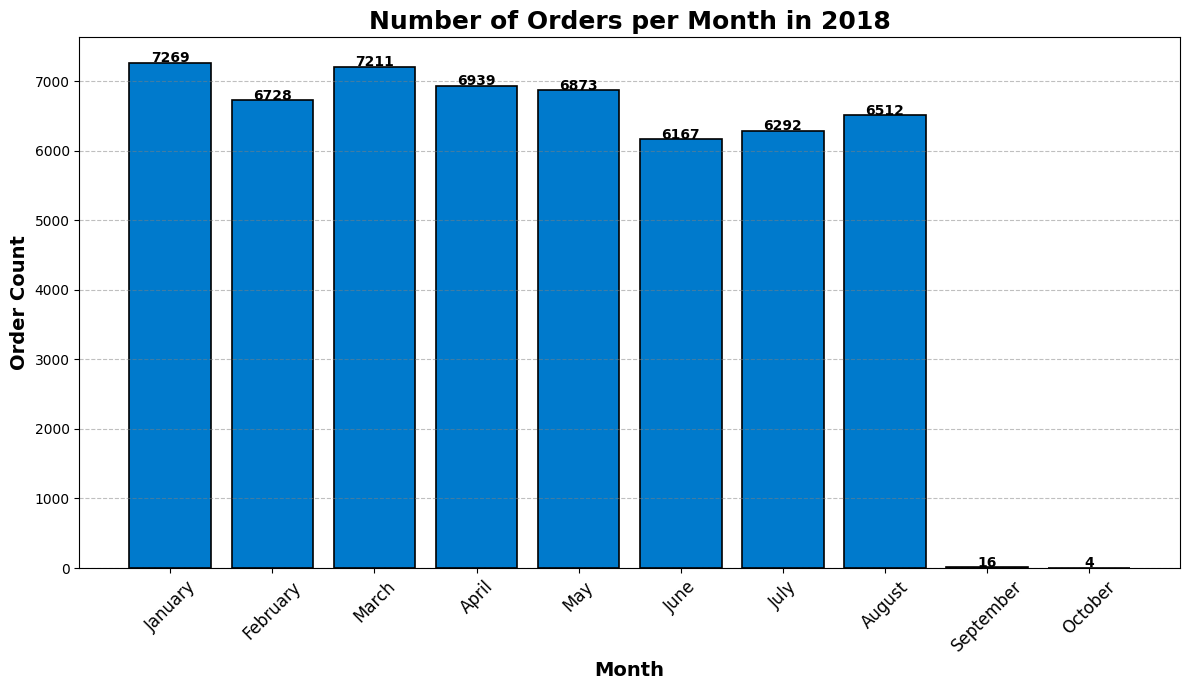

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.bar(orders_per_month_2018_df['Month'], orders_per_month_2018_df['Order Count'], color='#007acc', edgecolor='black', linewidth=1.2)
plt.title('Number of Orders per Month in 2018', fontsize=18, fontweight='bold')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Order Count', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', color='gray', alpha=0.5)
for i in range(len(orders_per_month_2018_df)):
    plt.text(x=i, y=orders_per_month_2018_df['Order Count'].iloc[i] + 5,
             s=str(orders_per_month_2018_df['Order Count'].iloc[i]),
             ha='center', fontsize=10, color='black', fontweight='bold')
plt.tight_layout()
plt.show()


2. Find the average number of products per order,
grouped by customer city.

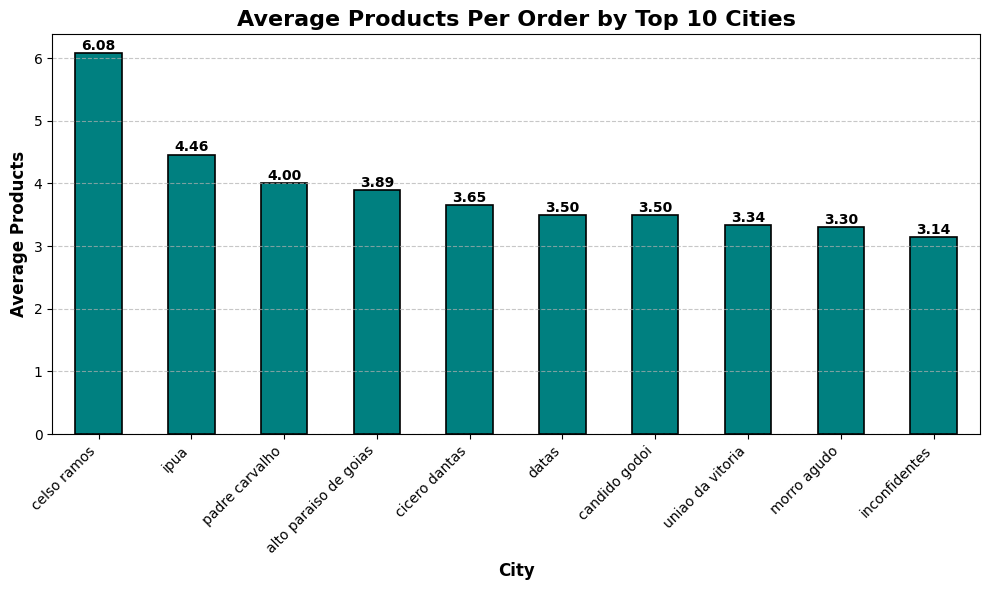

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
avg_products_per_city = orders_items_merged.groupby('customer_city')['order_item_id'].mean()
top_10_cities = avg_products_per_city.sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='teal', edgecolor='black', linewidth=1.2)
plt.title('Average Products Per Order by Top 10 Cities', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12, fontweight='bold')
plt.ylabel('Average Products', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
for i, value in enumerate(top_10_cities):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=10, color='black', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


3. Calculate the percentage of total revenue contributed
by each product category

In [ ]:
product_revenue = pd.merge(order_items, products, on='product_id', how='left')
product_revenue = pd.merge(product_revenue, orders, on='order_id', how='left')

product_revenue['total_price'] = product_revenue['price'] * product_revenue['order_item_id']
revenue_by_category = product_revenue.groupby('product category')['total_price'].sum()

total_revenue = revenue_by_category.sum()
revenue_percentage = (revenue_by_category / total_revenue) * 100
revenue_percentage

,total_price
product category,
Agro Industria e Comercio,0.602835
Art,0.166875
Arts and Crafts,0.012341
Bags Accessories,0.969899
Blu Ray DVDs,0.040617
...,...
sport leisure,7.120984
stationary store,1.615522
technical books,0.129776


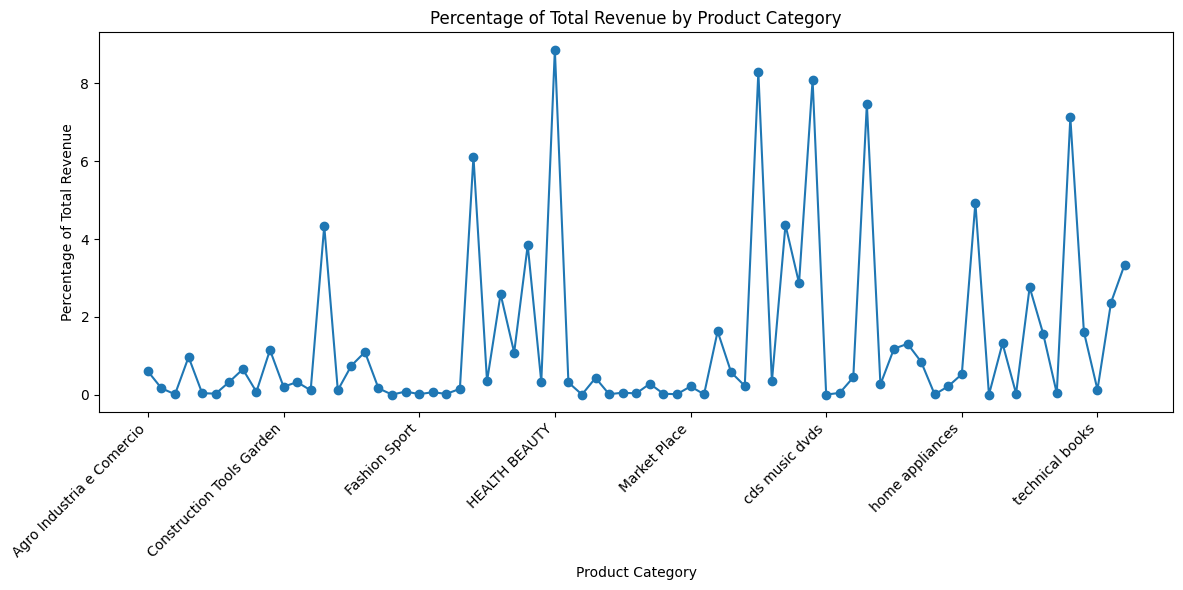

In [ ]:
plt.figure(figsize=(12, 6))
revenue_percentage.plot(kind='line', marker='o')
plt.title('Percentage of Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Percentage of Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

4. Identify the correlation between product price and the
number of times a product has been purchased.


In [ ]:
merged_data = pd.merge(order_items, products, on='product_id')
category_sales = merged_data.groupby('product category').agg(
    order_count=('product_id', 'count'),
    total_sales=('price', 'sum')
).reset_index()
category_sales['avg_price'] = category_sales['total_sales'] / category_sales['order_count']
category_sales = category_sales.sort_values(by='order_count', ascending=False)
category_sales = category_sales[['product category', 'order_count', 'avg_price']]
category_sales

,product category,order_count,avg_price
49,bed table bath,11115,93.296327
30,HEALTH BEAUTY,9670,130.163531
68,sport leisure,8641,114.344285
24,Furniture Decoration,8334,87.564494
53,computer accessories,7827,116.513903
...,...,...,...
50,cds music dvds,14,52.142857
39,La Cuisine,14,146.785000
41,PC Gamer,9,171.772222
18,Fashion Children's Clothing,8,71.231250


5. Calculate the total revenue generated by each seller,
and rank them by revenue.

In [ ]:
merged_data = pd.merge(order_items, payments, on='order_id')
seller_revenue = merged_data.groupby('seller_id').agg(
    total_revenue=('payment_value', 'sum')
).reset_index()
seller_revenue['rank'] = seller_revenue['total_revenue'].rank(ascending=False, method='dense')
seller_revenue = seller_revenue.sort_values(by='total_revenue', ascending=False)
seller_revenue

,seller_id,total_revenue,rank
1535,7c67e1448b00f6e969d365cea6b010ab,507166.91,1.0
192,1025f0e2d44d7041d6cf58b6550e0bfa,308222.04,2.0
881,4a3ca9315b744ce9f8e9374361493884,301245.27,3.0
368,1f50f920176fa81dab994f9023523100,290253.42,4.0
1013,53243585a1d6dc2643021fd1853d8905,284903.08,5.0
...,...,...,...
2087,ad14615bdd492b01b0d97922e87cb87f,19.21,3077.0
1370,702835e4b785b67a084280efca355756,18.56,3078.0
869,4965a7002cca77301c82d3f91b82e1a9,16.36,3079.0
1465,77128dec4bec4878c37ab7d6169d6f26,15.22,3080.0


# **C. ADVANCED QUESTIONS :**

1. Calculate the moving average of order values for each
customer over their order history.

In [ ]:
orders_with_customer_and_price = pd.merge(orders, customers, on='customer_id', how='inner')
orders_with_customer_and_price = pd.merge(orders_with_customer_and_price, order_items, on='order_id', how='inner')
customer_order_values = orders_with_customer_and_price.groupby(['customer_id', 'order_purchase_timestamp'])['price'].sum().reset_index()
customer_order_values = customer_order_values.sort_values(['customer_id', 'order_purchase_timestamp'])
customer_order_values['moving_average'] = customer_order_values.groupby('customer_id')['price'].rolling(window=3, min_periods=1).mean().reset_index(0,drop=True)
customer_order_values

,customer_id,order_purchase_timestamp,price,moving_average
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,89.80,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,54.90,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,179.99,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,149.90,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,93.00,93.00
...,...,...,...,...
98661,fffcb937e9dd47a13f05ecb8290f4d3e,2018-03-17 00:55:27,78.00,78.00
98662,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,54.90,54.90
98663,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,47.90,47.90
98664,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,199.90,199.90


2. Calculate the cumulative sales per month for each year.

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month'] = orders['order_purchase_timestamp'].dt.month
merged_data = pd.merge(orders, payments, on='order_id', how='inner')
monthly_sales = merged_data.groupby(['year', 'month'])['payment_value'].sum().reset_index()
monthly_sales['cumulative_sales'] = monthly_sales.groupby('year')['payment_value'].cumsum()
monthly_sales = monthly_sales.sort_values(by=['year', 'month'])
pd.DataFrame(monthly_sales)

,year,month,payment_value,cumulative_sales
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,138488.04
4,2017,2,291908.01,430396.05
5,2017,3,449863.60,880259.65
6,2017,4,417788.03,1298047.68
7,2017,5,592918.82,1890966.50
8,2017,6,511276.38,2402242.88
9,2017,7,592382.92,2994625.80


3. Calculate the year-over-year growth rate of total sales.


In [ ]:
merged_orders = pd.merge(orders, order_items, on='order_id', how='inner')
merged_orders['order_purchase_timestamp'] = pd.to_datetime(merged_orders['order_purchase_timestamp'])
merged_orders['year'] = merged_orders['order_purchase_timestamp'].dt.year
yearly_sales = merged_orders.groupby('year')['price'].sum()
yearly_growth_rate = yearly_sales.pct_change() * 100
yearly_growth_rate

,price
year,
2016,NaN
2017,12264.554035
2018,19.985094


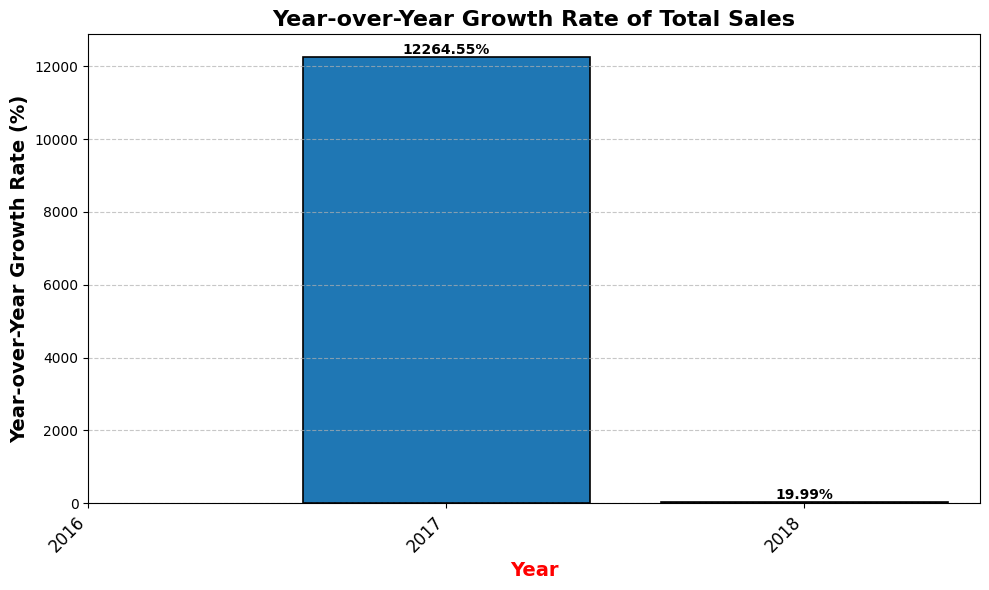

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_growth_rate.index, yearly_growth_rate.values, color='#1f77b4', edgecolor='black', linewidth=1.2)
plt.title("Year-over-Year Growth Rate of Total Sales", fontsize=16, fontweight='bold')
plt.xlabel("Year", color="red", fontsize=14, fontweight='bold')
plt.ylabel("Year-over-Year Growth Rate (%)", fontsize=14, fontweight='bold')
plt.xticks(yearly_growth_rate.index, rotation=45, ha='right', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')
plt.tight_layout()
plt.show()


4. Calculate the retention rate of customers, defined as the
percentage of customers who make another purchase within 6
months of their first purchase.

In [ ]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
first_purchase = orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.rename(columns={'order_purchase_timestamp': 'first_purchase_date'}, inplace=True)
orders = pd.merge(orders, first_purchase, on='customer_id', how='left')
orders['days_since_first_purchase'] = (orders['order_purchase_timestamp'] - orders['first_purchase_date']).dt.days
retained_customers = orders[(orders['days_since_first_purchase'] > 0) & (orders['days_since_first_purchase'] <= 180)]
total_customers = first_purchase['customer_id'].nunique()
retained_customers_count = retained_customers['customer_id'].nunique()
retention_rate = (retained_customers_count / total_customers) * 100
retention_rate_df = pd.DataFrame({
    'retained_customers': [retained_customers_count],
    'total_first_time_customers': [total_customers],
    'retention_rate': [retention_rate]
})

retention_rate_df

,retained_customers,total_first_time_customers,retention_rate
0,0,99441,0.0


5. Identify the top 3 customers who spent the most money in
each year.

In [ ]:
merged_df = pd.merge(orders, order_items, on='order_id', how='inner')
merged_df = pd.merge(merged_df, customers, on='customer_id', how='inner')
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['year'] = merged_df['order_purchase_timestamp'].dt.year
top_customers_per_year = merged_df.groupby(['year', 'customer_id'])['price'].sum().reset_index()
top_customers_per_year = top_customers_per_year.sort_values(['year', 'price'], ascending=[True, False])
top_3_customers = top_customers_per_year.groupby('year').head(3)
top_3_customers

,year,customer_id,price
213,2016,a9dc96b027d1252bbac0a9b72d837fc6,1399.00
37,2016,1d34ed25963d5aae4cf3d7f3a4cda173,1299.99
80,2016,4a06381959b6670756de02e07b83815f,1199.00
4156,2017,1617b1357756262bfa56ab541c47bc16,13440.00
35059,2017,c6e2731c5b391845f6800c97401a43a9,6735.00
11418,2017,3fd6777bbce08a352fddd04e4a7cc8f6,6499.00
94592,2018,ec5b2ba62e574342386871631fafd3fc,7160.00
96320,2018,f48d464a0baaea338cb25f816991ab1f,6729.00
92125,2018,e0a2412720e9ea4f26c1ac985f6a7358,4599.90


# **E-Commerce Analysis Project Overview :**


The E-Commerce Analysis Project offers a comprehensive review of an online retail platform’s data, providing valuable insights that inform strategic business decisions. This analysis focuses on key performance areas, including customer behavior, sales performance, revenue generation, and growth trends. The project delivers actionable insights that can drive optimization in various aspects of the business, from marketing to inventory management.

**Key Areas of Focus:**

1. Customer Insights:

* Geographic Segmentation: By analyzing customers’ locations, targeted marketing
campaigns can be developed to drive customer acquisition and improve retention strategies.
*Top Customers by Spending: Identifying high-value customers helps tailor personalized marketing efforts, enhancing customer relationships and increasing customer lifetime value.

2. Sales Performance:

* Product Category Analysis: Examining total sales by product category allows businesses to identify top-performing categories, guiding inventory management decisions and marketing strategies.
* Top-Performing Sellers: Analyzing seller performance helps allocate resources efficiently and informs partnership and vendor management decisions.

3. Payment Behavior:

* Payment Trends: Insights into payment preferences and behaviors can help design flexible payment options to enhance conversion rates and streamline the checkout process.

4. Revenue Generation:

* Revenue Breakdown: Detailed analysis of revenue contributions from different product categories and sellers helps optimize pricing and promotional strategies.
* Year-over-Year Sales Growth: Monitoring yearly growth and calculating moving averages allows businesses to recognize growth trends and forecast future performance improvements.

5. Growth Trends and Performance Patterns:

* Moving Averages: Calculating moving averages of sales data provides a clearer view of long-term performance trends, reducing noise from short-term fluctuations.
* Year-over-Year Comparison: Comparing sales performance across years reveals patterns and informs decisions on product launches, market expansion, and sales strategies.

**Strategic Impact:**

By leveraging the insights from this project, businesses can:

* Optimize Operations: Streamline inventory, payment processes, and marketing efforts based on data-driven decisions.

* Improve Customer Satisfaction: Offer personalized services and products that align with customer preferences, enhancing overall customer experience.

* Maximize Revenue: By identifying high-performing categories, sellers, and customers, businesses can optimize pricing, promotions, and resource allocation.

* Enhance Competitiveness: The analysis provides a sustainable advantage in a rapidly evolving e-commerce landscape, enabling businesses to adapt and capitalize on emerging trends effectively.






# **CONCLUSION :**

This project emphasizes the critical role of data in shaping successful e-commerce strategies. Through detailed analysis and segmentation, businesses can make informed decisions that foster long-term growth, improve operational efficiency, and build stronger customer relationships. The insights gained contribute to a sustained competitive edge in the fast-paced e-commerce industry, ensuring businesses remain agile and responsive to market shifts